### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "HA3.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "Nicole Tran Luu" 
NAME2 = "Cecilia Bustrén"
GROUP = "19"

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/HA3/HA3.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# Home Assignment 3
This home assignment will focus on reinforcement learning and deep reinforcement learning. The first part will cover value-table reinforcement learning techniques, and the second part will include neural networks as function approximators, i.e., deep reinforcement learning. 

When handing in this assignment, make sure that you're handing in the correct version, and more importantly, *that you do no clear any output from your cells*. We'll use these outputs to aid us when grading your assignment.

## Task 1: Gridworld

In this task, you will implement Value Iteration to solve for the optimal policy, $\pi^*$, and the corresponding state value function, $V^*$.

The MDP you will work with in this assignment is illustrated in the figure below.

![title](./grid_world.png) 

The agent starts in one of the non-black squares shown in the above figure, and then proceeds to take actions. The available actions at any time step are: **North, West, South,** and **East**. If an action would make the agent bump into a wall, or one of the black (unreachable) states, it instead does nothing, leaving the agent at the same place it was before.

The reward $\mathcal{R}_s^a$ of being in state $s$ and performing actions $a$ is zero for all states, regardless of the action taken, with the exception of the green and the red squares. For the green square, the reward is always 1, and for the red square, always -1, regardless of the action.

When the agent is either in the green or the red square, it will be transported to the terminal state in the next time step, regardless of the action taken. The terminal state is shown as the white square with the "T" inside.

#### State representation
The notations used to define the states are illustrated in the table below

| $S_0$ | $S_1$ | $S_2$ | $S_3$ | $S_4$ |    |
|-------|-------|-------|-------|-------|----|
| $S_5$ | $S_6$ | $S_7$ | $S_8$ | $S_9$ |    |
| $S_{10}$ | $S_{11}$ | $S_{12}$ | $S_{13}$ | $S_{14}$ | $S_{15}$|

where $S_{10}$ corresponds to the initial state of the environment, $S_4$ and $S_9$ to the green and red states of the environment, and $S_{15}$ to the terminal state.


### Task 1.1: Solve for $V^*(s)$ and $Q^*(s,a)$
For this task all transition probabilities are assumed to be 1 (that is, trying to move in a certain direction will definitely move the agent in the chosen direction), and a discount factor of 0.9, i.e., $\gamma=0.9$.

* Solve for $V^*(S_{10})$ 

**Your answer:** $V^*(S_{10}) = 0.9^6 = 0.53$

* Solve $Q^*(S_{10},a)$ for all actions

**Your answer:** $Q^*(S_{10},a_{0,3) = 0.9^6 = 0.53$, $Q^*(S_{10},a_{1,2) = 0.9^7 = 0.48$



### Task 1.2 Write a mathematical expression relating $V^\pi(s)$ to $Q^\pi(s,a)$ and $\pi(a|s)$


**Your answer:** $Q^\pi(s,\pi(s)) = V^\pi(s)$

$ V^\pi(s) = \sum_{a\in A} \pi(a|s)q_{\pi}(s,a)$


###  Task 1.3: Value Iteration
For this task, the transitions are no longer deterministic. Instead, there is a 0.2 probability that the agent will try to travel in an orthogonal direction of the chosen action (0.1 probability for each of the two orthogonal directions). Note that the Markov decision process is still known and does not have to be learned from experience.

Your task is to implement value iteration and solve for the:
* optimal greedy policy $\pi^*(s)$ 
* $V^*(s)$

#### The value iteration algorithm
Value iteration is an iterative algorithm used to compute the optimal value function $V^*(s)$. Each iteration starts with a guess of what the value function is and then uses the Bellman equations to improve this guess iteratively. We can describe one iteration of the algorithm as

$
\textbf{For} ~ s \in {\cal S}:\qquad  \\
\quad V_{k+1}(s) = \underset{a \in {\cal A}}{\text{max}}~ \left( \mathcal{R}_s^a + \gamma \underset{{s'\in \mathcal{S}}}{\sum} \mathcal{P}_{ss'}^a \cdot V_k(s') \right)
$

where $\mathcal{P}_{ss'}^a={\mathrm Pr}[S'=s'\big|S=s,A=a]$ is the probability to transition from state $s$ to $s'$ given action $a$.


#### The MDP Python class
The Markov Decision Process you will work with is defined in `gridworld_mdp.py`. In the implementation, the actions are represented by integers as, North = 0, West = 1, South = 2, and East = 3.
To interact with the MDP, you need to instantiate an object as: 


```python
mdp = GridWorldMDP()
```

At your disposal there are a number of instance-functions implemented for you, and presented below:

In [7]:
from gridworld_mdp import *
import numpy as np

help(GridWorldMDP.get_states)

Help on function get_states in module gridworld_mdp:

get_states(self)
    Returns complete set of states for the MDP
    :return: numpy array of shape [num states,]



In [8]:
# The constructor
help(GridWorldMDP.__init__)

Help on function __init__ in module gridworld_mdp:

__init__(self, trans_prob=0.8)
    Initializes an instance of the GridWorldMDP class
    :param trans_prob: transition probabilities (e.g. =1 for deterministic MDP)



In [9]:
help(GridWorldMDP.get_actions)

Help on function get_actions in module gridworld_mdp:

get_actions(self)
    Returns complete set of actions for the MDP
    :return: numpy array of shape [num actions,]



In [10]:
help(GridWorldMDP.state_transition_func)

Help on function state_transition_func in module gridworld_mdp:

state_transition_func(self, s, a)
    Returns the transition probabilities to all states given current state and action
    :param state: current state as integer
    :param action: selected action as integer
    :return: state-transition probabilities, i.e.
     [P[S_0| S=s, A_t=a], P[S_1| S=s, A=a], ..., P[S_14| S=s, A=a]]



In [11]:
help(GridWorldMDP.reward_function)

Help on function reward_function in module gridworld_mdp:

reward_function(self, s, a)
    Returns the reward r(s,a)
    :param state: current state as integer
    :param action: selected action as integer
    :return: r(s,a)



We also provide two helper functions for visualizing the value function and the policies you obtain:

In [12]:
# Function for printing a policy pi
def print_policy(pi):
    print('Policy for non-terminal states: ')
    indencies = np.arange(1, 16)
    txt = '| '
    hor_delimiter = '---------------------'
    print(hor_delimiter)
    for a, i in zip(pi, indencies):
        txt += mdp.act_to_char_dict[a] + ' | '
        if i % 5 == 0:
            print(txt + '\n' + hor_delimiter)
            txt = '| '
    print('                            ---')
    print('Policy for terminal state: |', mdp.act_to_char_dict[pi[15]],'|')
    print('                            ---')            

# Function for printing a table with of the value function
def print_value_table(values, num_iterations=None):            
    if num_iterations:
        print('Values for non-terminal states after: ', num_iterations, 'iterations \n', np.reshape(values, [3, 5]), '\n')
        print('Value for terminal state:', terminal_value, '\n')
    else: 
        terminal_value = values[-1]
        print('Values for non-terminal states: \n', np.reshape(values[:-1], [3, 5]))
        print('Value for terminal state:', terminal_value, '\n')

(**1 POE**) Now it's time for you to implement your own version of value iteration to solve for the greedy policy and $V^*(s)$.

In [13]:
import numpy as np

def value_iteration(gamma, mdp):
    """
    Returns:
        V - state value table, numpy array of shape (16,)
        pi - greedy policy table, numpy array of shape (16,)
    """
    V = np.zeros([16]) # state value table
    pi = np.zeros([16]) # greedy policy
    s = mdp.get_states()
    a = mdp.get_actions()
    optimal = False
    
    V_temp = np.zeros([a.shape[0]]) # state value table
    V_prev = np.ones(V.shape)
    
    for k in range(100):
    #while((V_prev != V)):
        V_prev = V
        for i in range(V.shape[0]-2,-1,-1): # Iterate from 14 to 0
            #print('i',i)
            
            for j in range(a.shape[0]):
                Ra_s = mdp.reward_function(s[i],a[j])
                Pr = mdp.state_transition_func( s[i], a[j])
                V_temp[j] = Ra_s + gamma*np.dot(Pr,V)
                
            V[i] = max(V_temp)
            pi[i] = np.argmax(V_temp)
        
    return V, pi


Run your implementation for the deterministic version of our MDP. As a sanity check, compare your analytical solutions with the output from your implementation.

In [14]:
mdp = GridWorldMDP(trans_prob=1.)
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.6561    0.729     0.81      0.9       1.      ]
 [ 0.59049   0.        0.        0.81     -1.      ]
 [ 0.531441  0.59049   0.6561    0.729     0.6561  ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | E | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


Once your implementation passed the sanity check, run it for the stochastic case, where the probability of an action succeding is 0.8, and 0.2 of moving the agent in an orthogonal direction to the intended. Use $\gamma = .99$.

In [15]:
# Run for stochastic MDP, gamma = .99
mdp = GridWorldMDP()
v, pi = value_iteration(.99, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.93861973  0.95193393  0.9639533   0.97612442  1.        ]
 [ 0.92691624  0.          0.          0.88371824 -1.        ]
 [ 0.91395196  0.90255605  0.89130223  0.88057655  0.79978026]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | W | N | 
---------------------
| N | W | W | W | S | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


**(2 POE)** Does the policy that the algorithm found look reasonable? 

In particular, what's the policy for state $S_8$? Is that a good idea? Why?

**Your answer:** The policy is W, $V(s_8) = 0.88371824$. This is good idea because then it will garantee that the next step won't appear in state 9 which gives a reward function -1. If it were to go north, for example, there would be a 10% chance of it going to -1 reward state s_9. Since gamma is very large, the value of the next state is considered with high importance, and thus we will want to avoid the bad state completely.

Test your implementation using this function.

In [16]:
test_value_iteration(v, pi)

Passed: state-value test, for gamma=.99
Passed: policy test, for gamma=.99


Run value iteration for the same scenario as above, but now with $\gamma=.9$

In [17]:
# Run for stochastic MDP, gamma = .9
mdp = GridWorldMDP()
v, pi = value_iteration(.9, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.56631445  0.65360208  0.74438015  0.84776628  1.        ]
 [ 0.49725171  0.          0.          0.57185903 -1.        ]
 [ 0.43084446  0.37830245  0.41624465  0.47405641  0.2761765 ]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | W | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


In [18]:
mdp = GridWorldMDP()
v, pi = value_iteration(.8, mdp)
print_value_table(v)
print_policy(pi)

Values for non-terminal states: 
 [[ 0.31674452  0.4251541   0.55801476  0.73239437  1.        ]
 [ 0.24132916  0.          0.          0.42253521 -1.        ]
 [ 0.18293588  0.1731294   0.22723234  0.29824244  0.12051648]]
Value for terminal state: 0.0 

Policy for non-terminal states: 
---------------------
| E | E | E | E | N | 
---------------------
| N | N | N | N | N | 
---------------------
| N | E | E | N | W | 
---------------------
                            ---
Policy for terminal state: | N |
                            ---


**(2 POE)** Do you notice any difference between the greedy policy for the two different discount factors. If so, what's the difference, and why do you think this happened?

**Your answer:** Yes, the policy for state 8, 12,13 and 14 have changed. This is because when discount factor is decreased, the policy will take less into account the possible following states, meaning that eg. for state 8, if you take action N there is a 10% chance of going E to the -1 reward state. When the discount factor is 0.99 this is taken into account very well, and the policy is instead W, to avoind the bad state s_9 completely. When gamma is only 0.9, however, this is not considered as much, which leads to the immediate return having a larger inpact for the optimal value function, and the action N is chosen instead. If gamma is decreased further to 0.8, the state s_11 will change policy from W to E, and take a shortcut by the bad state s_9. 

This is seen from value function: $V^{*}(s_{i}) \leftarrow max R^a_s + \gamma \sum P^{a}_{ss'} V^{*}(s')$

## Task 2: Q-learning

In the previous task, you solved for $V^*(s)$ and the greedy policy $\pi^*(s)$, with the entire model of the MDP being available to you. This is however not very practical since for most problems we are trying to solve, the model is not known, and estimating the model for some applications is a very demanding process which often also requires a lot of simplifications. 

In this task, you will implement the Q-learning algorithm, an alternative that learns $Q$-values from experience, without the need of a model.

#### Q-learning algorithm
$
\text{Initialize}~Q(s,a), ~ \forall~ s \in {\cal S},~ a~\in {\cal A} \\
\textbf{Repeat}~\text{(for each episode):}\\
\quad \text{Initialize}~s\\
\qquad \textbf{Repeat}~\text{(for each step in episode):}\\
\qquad\quad \text{Chose $a$ from $s$ using poliy derived from $Q$ (e.g., $\epsilon$-greedy)}\\
\qquad\quad \text{Take action a, observe r, s'}\\
\qquad\quad Q(s,a) \leftarrow Q(s,a) + \alpha \left(r + \gamma~\underset{a}{\text{max}}~Q(s',a) - Q(s,a) \right) \\
\qquad\quad s \leftarrow s' \\
\qquad \text{Until s is terminal}
$

### Task 2.1  Implement an $\epsilon$-greedy policy

**(1 POE)**

The goal of the Q-learning algorithm is to find the optimal policy $\pi^*$, by estimating the state action value function under the optimal policy, i.e., $Q^*(s, a)$. From $Q^*(s,a)$, the agent can follow $\pi^*$ by choosing the action that yields the largest expected value for each state, i.e., $\text{argmax}_a~Q^*(s, a)$. However, when training a Q-learning model, the agent typically follows another policy to explore the environment (instead of the one that maximizes the current Q-values). In reinforcement learning this is known as off-policy learning. 

Your task is to implement a widely popular exploration policy, known as  the $\epsilon$-greedy policy, in the cell below.

An $\epsilon$-greedy policy should:
* with probability $\epsilon$ take an uniformly-random action.
* otherwise choose the best action according to the estimated state action values.

*Hint:* The $\epsilon$-greedy policy can be implemented extra elegantly by calculating the actual resulting sampling distribution.

In [19]:
def eps_greedy_policy(q_values, eps):
    '''
    Creates an epsilon-greedy policy
    :param q_values: set of Q-values of shape (num actions,)
    :param eps: probability of taking a uniform random action 
    :return: policy of shape (num actions,)
    '''
    m = len(q_values)
    
    policy = np.ones(q_values.shape, dtype=float) * (eps/m)
    max_ind = np.argmax(q_values)
    policy[max_ind] += (1 - eps)
    return policy
    

Run the cell below to test your implementation

In [20]:
import math
mdp = GridWorldMDP()

# Test shape of output
actions = mdp.get_actions()
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"
actions = [i for i in range(10)]
for eps in (0, 1):
    foo = np.zeros([len(actions)])
    foo[0] = 1.
    eps_greedy = eps_greedy_policy(foo, eps)
    assert foo.shape == eps_greedy.shape, "wrong shape of output"

# Test for greedy actions
for a in actions:
    foo = np.zeros([len(actions)])
    foo[a] = 1.
    eps_greedy = eps_greedy_policy(foo, 0)
    assert np.allclose(foo, eps_greedy, rtol=1e-03), "policy is not greedy"

# Test for uniform distribution, when eps=1
eps_greedy = eps_greedy_policy(foo, 1)
assert all(math.isclose(p, eps_greedy[0], rel_tol=1e-03) for p in eps_greedy),\
    "policy does not return a uniform distribution for eps=1"
assert math.isclose(np.sum(eps_greedy), 1.0, rel_tol=1e-03), "policy distribution is not normalized"


print('Test passed, good job!')

Test passed, good job!


### Task 2.2: Implement the Q-learning algorithm

Now it's time to actually implement the Q-learning algorithm. Unlike the Value iteration where there are no direct interactions with the environment, the Q-learning algorithm builds up its estimates by interacting and exploring the environment. 

To enable the agent to explore the environment a set of helper functions are provided:

In [21]:
help(GridWorldMDP.reset)

Help on function reset in module gridworld_mdp:

reset(self)
    Resets the environment and the agent is positioned in the initial state in the bottom left corner.
    :return: state, reward, terminal



In [22]:
help(GridWorldMDP.step)

Help on function step in module gridworld_mdp:

step(self, action)
    Takes one step in the environment using the selected action
    :param action: action to execute, integer
    :return: state, reward, terminal



Implement your version of Q-learning in the cell below. 

**Hint:** It might be useful to study the pseudocode provided above. 

In [23]:
def q_learning(eps, gamma, mdp):
    Q = np.zeros([16, 4], dtype=float) # state action value table
    pi = np.zeros([16], dtype=float) # greedy policy table
    alpha = .01

    
    episode = 10000
    for e in range(episode):
        
        isTerm = False
        s = mdp.reset() # Initial state position
        i = s[0]
        #print('-----------episode----------------------------',e)
        
        while(isTerm == False):
            
            policy = eps_greedy_policy(Q[i,:], eps)
            
            a = np.random.choice(np.arange(len(policy)), p = policy)
                
            s_prim,reward,isTerm = mdp.step(a)
            
            Qmax_prim = np.max(Q[s_prim,:])
            Q[i,a] += alpha * (reward + (gamma*Qmax_prim) - Q[i,a])
            s = s_prim
            i = s
    pi = np.argmax(Q,axis = 1)
            
    print(Q)
    
    return pi, Q

Run Q-learning with for the stochastic MDP with $\epsilon = 1, \gamma=0.99$.

In [25]:
mdp = GridWorldMDP()
pi, Q = q_learning(1, .99, mdp)
print_policy(pi)

[[ 0.93343449  0.93052477  0.92377903  0.94112468]
 [ 0.94386667  0.93402095  0.94404205  0.95256396]
 [ 0.95549427  0.9462291   0.95559969  0.96312807]
 [ 0.96832006  0.95772307  0.88336998  0.97189063]
 [ 0.99991535  0.99993214  0.99993146  0.99993006]
 [ 0.9286149   0.91999935  0.90880471  0.91923521]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.69648617  0.86977652  0.68848821 -0.58343807]
 [-0.99999977 -0.9999998  -0.99999983 -0.9999999 ]
 [ 0.91552126  0.90760973  0.90594613  0.89956783]
 [ 0.89582251  0.90486247  0.8962991   0.88702929]
 [ 0.88442106  0.89301426  0.88462843  0.87491413]
 [ 0.85260764  0.88155274  0.86312591  0.7690849 ]
 [-0.66279237  0.66782034  0.75709151  0.6414069 ]
 [ 0.          0.          0.          0.        ]]
Policy for non-terminal states: 
---------------------
| E | E | E | E | W | 
---------------------
| N | N | N | W | N | 
---------------------
| N | W | W | W | S | 
---------------

Test your implementation by running the cell below

In [26]:
test_q_learning(Q)

Passed: policy test, for gamma=.99


Run Q-learning with $\epsilon=0$

In [27]:
mdp = GridWorldMDP()
pi, Q = q_learning(0, .99, mdp)
print_policy(pi)

[[ 4.69677474e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.11717922e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.05939833e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.69368136e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.72012863e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.40449915e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.13615128e-01 -1.13615128e-01 -1.04661746e-01 -1.04661746e-01]
 [ 4.56035459e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.00350699e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.13849913e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.09638978e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.90000000e-05  8.72568424e-02  0.00000000e+00  0.00000000e

**(2 POE)** You ran your implementation with $\epsilon$ set to both 0 and 1. Did both values yield the same solution? Why?

**Your answer:** No, we do not get the same solution for epsilon 1 and epsilon 0. With the epsilon-greedy function, when epsilon is 0 we get pi = 1 for a*=argmax(Q) and zeros otherwise. In the first episode, it will take the best action (here, N simply because this is the first option of action) and explore the policy and value function for that path. Since there is a 20% orthogonal path chance, we will evenutually end up in our terminal state. In this case, because of the layout of the grid, we will most likely end up with a positive reward, which will increase the Q-value for north, in most states. This action (N) will now always be the policy from our epsilon-greedy function.

For state s_14 however, if we take action N we get an immediate negative reward, which will give a negative Q-value for action N. Thus, with our epsilon-greedy function we will instead be taking the next (max) action, which is W. This does not give a negative reward, and this will be the chosen action for this state.

With epsilon = 1 we will get an initial policy of eps/m for all actions, and the network will explore all actions to find the optimal action for each state.

# Task 3: Deep Double Q-learning (DDQN)
For this task, you will implement a DDQN (double deep Q-learning network) to solve one of the problems of the OpenAI gym. Before we get into details about these type of networks, let's first review the simpler, DQN (deep Q-learning network) version.

**Again, note that in the end we will implement DDQN, and not DQN.**

## Deep Q Networks (DQN)
As we saw in the video lectures, using a neural network as a state action value approximator is a great idea. However, if one tries to use this approach with Q-learning, it's very likely that the optimization will be very unstable. To remediate this, two main ideas are used.
- First, we use experience replay, in order to decorrelate the experience samples we obtain when exploring the environment.
- Second, we use two networks instead of one, in order to fix the optimization targets. Each of these ideas are explained below.

#### Experience replay
Since Q-learning is an off-policy algorithm, we may collect data by navigating in the environment using some choice of behavioral / exploratory policy $\mu$ (e.g. $\epsilon$-greedy), while still learning the $Q$ values for an optimal policy. Experience replay exploits this even further, and re-uses old data, which was collected using whatever exploratory policy we used at that moment (e.g. $\epsilon$-greedy w.r.t. to those approximate $Q$ values).

Except for re-using already collected data, another advantage of experience replay is that it allows us to decorrelate the data, by sampling experience from very different parts of the environment, rather than using the samples for training in the order they were collected when walking around in the environment.

Decorrelating the data is essential for training neural networks.

#### Fixing the optimization target
That is, for a given minibatch sampled from the replay buffer, we'll optimize the weights of only one of the networks (commonly denoted as the "online" network), using the gradients w.r.t a loss function. This loss function is computed as the mean squared error between the current action values, computed according to the **online** network, and the Q targets, computed using the other, **offline network** (which we'll also refer to as the fixed network or target network).

That is, the loss function is 

$$ L(\theta) = \frac{1}{N}\sum_{i=1}^N \left(Q(s_i,a_i; \theta\right) - Y_i)^2~,$$

where $N$ is the number of samples in your minibatch, $Q(s,a;\theta)$ is the state action value estimate, according to the online network (with parameters $\theta$), and $Y_t$ is the Q target, computed as

$$ Y_i = r_i +  \gamma ~\underset{a}{\text{max}}~Q(s_i', a; \theta^-)~, $$

where $Q(s', a;\theta')$ is the action value estimate, according to the offline network (with parameters $\theta^-$).

Finally, so that the offline parameters are also updated, we periodically copy the parameters from the online to the offline network.

#### Training loop essentials
The following key components are repeated for every time step $t$ in an episode:
1. Sample an action $a_t$ from the $\epsilon$-greedy policy w.r.t. the current estimated $Q$ values (online network), and execute the action in the environment.
1. The current transition $(s_t, a_t, r_{t+1}, s_{t+1})$ is stored in the replay buffer.
1. An entire mini-batch of transitions is sampled from the replay buffer, and a gradient step is taken to improve the online network.

## Double Deep Q Networks (DDQN)

The idea explained above works well in practice, but later it was discovered that this approach is very prone to overestimating the state action values. The main reason for this is that the max operator, used to select the greedy action when computing the Q target, uses the same values both to select and to evaluate an action (this tends to prefer overestimated actions). In order to prevent this, we can decouple the selection from the evaluation, which is the idea that created DDQN. More concretely, the Q target for a DDQN is now 

$$ Y_i = r_i + \gamma Q(s_i', \underset{a}{\text{argmax}}Q(s_i',a;\theta); \theta^-)~. $$

Hence, we're using the **online** network to select which action is best, but we use the **offline** network to evaluate the state action value for that chosen action in the next state. This is what makes DDQN not overestimate (as much) the state action values, which in turn helps us to train faster and obtain better policies.

Note that while the online network is constantly updated (as opposed to the offline network), the Q target (in which both the online and offline network are included for DDQN) should always be regarded as a constant when taking the gradient steps.

## Target notation

Several different optimization targets which are estimated with some $q$ function are often jointly referred to as "TD targets".
We strive to be consistent and separate on-policy "TD(0) targets" and off-policy "Q targets" but in other places this distinction may be less clear.

#### Environment

The problem you will solve for this task is the inverted pendulum problem. 
On [Open AIs environment documentation](https://gym.openai.com/envs/CartPole-v0) , the following description is provided:

*A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every time step that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.*

Furthermore, the episode will automatically end if 200 steps are reached, as explained [here](https://github.com/openai/gym/wiki/CartPole-v0#episode-termination).

![title](./cartpole.jpg)

#### Run the cell below to see a video illustration of the environment

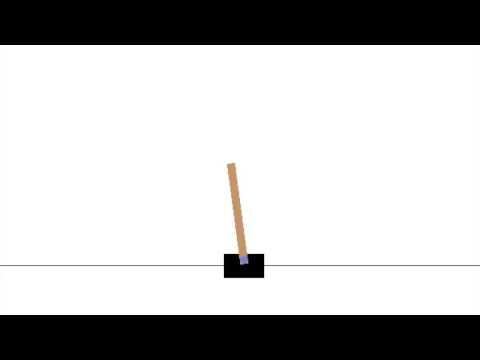

In [32]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('46wjA6dqxOM')

#### Implementation
We'll solve this task using a DDQN. Most of the code is provided for you, in the file **ddqn_model.py**. This file contains the implementation of a neural network, which is described in the table below (feel free to experiment with different architectures).

|Layer 1: units, activation | Layer 2: units, activation | Layer 3: units, activation | Cost function |
|---------------------------|----------------------------|----------------------------|---------------|
| 100, ReLu                 | 60, ReLu                   | number of actions, linear | MSE           |

There are however a few key parts missing from the code, that are to be implemented in the following three functions:
- `calc_q_and_take_action`
- `calculate_q_targets`
- `sample_batch_and_calculate_loss`

These will then be called from the function `train_loop_ddqn`, which runs the main loop for training the model in the cart-pole environment.

## Task 3.1:  Calculate Q-values & take action
Calculate Q-values for the current state, and decide on which action to take. Use an epsilon-greedy behavioral policy, and feel free to re-use the `epsilon_greedy_policy` function that you defined for the Q-learning part.

This function will be used to control the agent's behavior in the environment, but the actual training will be done later, for entire mini-batches sampled from the replay buffer.

In [33]:
def calc_q_and_take_action(ddqn, state, eps):
    '''
    Calculate Q-values for current state, and take an action according to an epsilon-greedy policy.
    Inputs:
        ddqn   - DDQN model. An object holding the online / offline Q-networks, and some related methods.
        state  - Current state. Numpy array, shape (1, num_states).
        eps    - Exploration parameter.
    Returns:
        q_online_curr   - Q(s,a) for current state s. Numpy array, shape (1, num_actions) or  (num_actions,).
        curr_action     - Selected action (0 or 1, i.e., left or right), sampled from epsilon-greedy policy. Integer.
    '''
    # FYI:
    # ddqn.online_model & ddqn.offline_model are Pytorch modules for online / offline Q-networks, which take the state as input, and output the Q-values for all actions.
    # Input shape (batch_size, num_states). Output shape (batch_size, num_actions).
    
    
    # Convert states from numpy to tensor
    
    
    state = torch.tensor(state[0], dtype=torch.float)
    
    q_online_curr = ddqn.online_model(state)
    q_online_curr = q_online_curr.detach().numpy()
            
    policy = eps_greedy_policy(q_online_curr , eps)
    
    curr_action = np.random.choice(np.arange(len(policy)), p = policy)    

    return q_online_curr, curr_action

## Task 3.2:  Calculate Q target

**(2 POE)**

For this task, you will calculate the temporal difference target used for the loss in the double Q-learning algorithm. Your implementation should follow precisely the equation defined above for the Q target of DDQNs, with one exception: when s' is terminal, the Q target for it should simply be $ Y_i = r_i$. Why is this necessary?

**Your answer:** Since the s' is the terminal state, there are no more actions to take there, and we won't get any Q(s',argmaxQ(s',a)), thus we only take the immediate reward as the Q-target. Intuitively, in the terminal state there are no more actions to take, and we therefore have no expected return to calculate, and only get the immediate reward.

Implement your function in the following cell.

In [34]:
def calculate_q_targets(q1_batch, q2_batch, r_batch, nonterminal_batch, gamma=.99):
    '''
    Calculates the Q target used for the loss
    : param q1_batch: Batch of Q(s', a) from online network. FloatTensor, shape (N, num actions)
    : param q2_batch: Batch of Q(s', a) from target network. FloatTensor, shape (N, num actions)
    : param r_batch: Batch of rewards. FloatTensor, shape (N,)
    : param nonterminal_batch: Batch of booleans, with False elements if state s' is terminal and True otherwise. BoolTensor, shape (N,)
    : param gamma: Discount factor, float.
    : return: Q target. FloatTensor, shape (N,)
    '''
    N = q1_batch.shape[0]

    a_max = torch.argmax(q1_batch, axis = 1)
    Y = torch.zeros(r_batch.shape)
    
    for i in range(N):
        Y[i] = r_batch[i] + gamma*(q2_batch[i,a_max[i]])
        
        if (~nonterminal_batch[i]):
            Y[i] = r_batch[i]
            
    return Y

Test your implementation by running the cell below

In [35]:
import torch
import dqn_model
dqn_model.test_calculate_q_targets(calculate_q_targets)

Passed: Calculate Q targets test, for function "calculate_q_targets"


## Task 3.3: Calculate mini-batch Q-values

Use the online & offline Q-networks to calculate the Q-values for a minibatch. These will then be used to calculate the mini-batch loss by the end of the function.

You will need to define three tensors:
- `q_online_curr`: $Q(s,a; \theta), \ \forall a$
- `q_online_next`: $Q(s',a; \theta), \ \forall a$
- `q_offline_next`: $Q(s',a; \theta^-), \ \forall a$

Take great care to make sure gradient computation is enabled / disabled where it should. `torch.no_grad()` is your friend here (see [Pytorch docs](https://pytorch.org/docs/stable/torch.html#locally-disabling-gradient-computation)).

In [36]:
def sample_batch_and_calculate_loss(ddqn, replay_buffer, batch_size, gamma):
    '''
    Sample mini-batch from replay buffer, and compute the mini-batch loss
    Inputs:
        ddqn          - DDQN model. An object holding the online / offline Q-networks, and some related methods.
        replay_buffer - Replay buffer object (from which samples will be drawn)
        batch_size    - Batch size
        gamma         - Discount factor
    Returns:
        Mini-batch loss, on which .backward() will be called to compute gradient.
    '''
    # Sample a minibatch of transitions from replay buffer
    curr_state, curr_action, reward, next_state, nonterminal = replay_buffer.sample_minibatch(batch_size)

    # FYI:
    # ddqn.online_model & ddqn.offline_model are Pytorch modules for online / offline Q-networks, which take the state as input, and output the Q-values for all actions.
    # Input shape (batch_size, num_states). Output shape (batch_size, num_actions).
    
    q_online_curr = ddqn.online_model(curr_state)
    
    with torch.no_grad():
        q_online_next = ddqn.online_model(next_state)
        q_offline_next = ddqn.offline_model(next_state)

    q_target = calculate_q_targets(q_online_next, q_offline_next, reward, nonterminal, gamma=gamma)
    
    loss = ddqn.calc_loss(q_online_curr, q_target, curr_action)
    
    return loss

Test your implementation by trying to solve the reinforcement learning problem for the Cartpole environment. The `train_loop_ddqn` function defined below will be called later.

In [37]:
# Import dependencies
import torch
import numpy as np
import gym
from collections import namedtuple
from dqn_model import DoubleQLearningModel, ExperienceReplay

In [38]:
# CPU should be enough, but feel free to play around with this if you want to.
device = torch.device("cpu")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [39]:
def train_loop_ddqn(ddqn, env, replay_buffer, num_episodes, enable_visualization=False, batch_size=64, gamma=.94):        
    Transition = namedtuple("Transition", ["s", "a", "r", "next_s", "t"])
    eps = 1.
    eps_end = .1 
    eps_decay = .001
    tau = 1000
    cnt_updates = 0
    R_buffer = []
    R_avg = []
    for i in range(num_episodes):
        state = env.reset() # Initial state
        state = state[None,:] # Add singleton dimension, to represent as batch of size 1.
        finish_episode = False # Initialize
        ep_reward = 0 # Initialize "Episodic reward", i.e. the total reward for episode, when disregarding discount factor.
        q_buffer = []
        steps = 0
        while not finish_episode:
            if enable_visualization:
                env.render() # comment this line out if you don't want to / cannot render the environment on your system
            steps += 1

            # Take one step in environment. No need to compute gradients,
            # we will just store transition to replay buffer, and later sample a whole batch
            # from the replay buffer to actually take a gradient step.
            q_online_curr, curr_action = calc_q_and_take_action(ddqn, state, eps)
            q_buffer.append(q_online_curr)
            new_state, reward, finish_episode, _ = env.step(curr_action) # take one step in the evironment
            new_state = new_state[None,:]
            
            # Assess whether terminal state was reached.
            # The episode may end due to having reached 200 steps, but we should not regard this as reaching the terminal state, and hence not disregard Q(s',a) from the Q target.
            # https://arxiv.org/abs/1712.00378
            nonterminal_to_buffer = not finish_episode or steps == 200
            
            # Store experienced transition to replay buffer
            replay_buffer.add(Transition(s=state, a=curr_action, r=reward, next_s=new_state, t=nonterminal_to_buffer))

            state = new_state
            ep_reward += reward
            
            # If replay buffer contains more than 1000 samples, perform one training step
            if replay_buffer.buffer_length > 1000:
                loss = sample_batch_and_calculate_loss(ddqn, replay_buffer, batch_size, gamma)
                ddqn.optimizer.zero_grad()
                loss.backward()
                ddqn.optimizer.step()

                cnt_updates += 1
                if cnt_updates % tau == 0:
                    ddqn.update_target_network()
                
        eps = max(eps - eps_decay, eps_end) # decrease epsilon        
        R_buffer.append(ep_reward)
        
        # Running average of episodic rewards (total reward, disregarding discount factor)
        R_avg.append(.05 * R_buffer[i] + .95 * R_avg[i-1]) if i > 0 else R_avg.append(R_buffer[i])

        print('Episode: {:d}, Total Reward (running avg): {:4.0f} ({:.2f}) Epsilon: {:.3f}, Avg Q: {:.4g}'.format(i, ep_reward, R_avg[-1], eps, np.mean(np.array(q_buffer))))
        
        # If running average > 195 (close to 200), the task is considered solved
        if R_avg[-1] > 195:
            return R_buffer, R_avg
    return R_buffer, R_avg

The following cell performs the actual training. 

A working implementation should start to improve after 500 episodes. An episodic reward of around 200 is likely to be achieved after 800 episodes for a batchsize of 128, and 1000 episodes for a batchsize of 64.

**Note:** The `enable_visualization` flag controls whether a visualization of the cart-pole environment will be plotted. In many environments, this is however not working properly, for which reason it is disabled by default.

In [40]:
# Create the environment
env = gym.make("CartPole-v0")

# Enable visualization? Does not work in all environments.
enable_visualization = False

# Initializations
num_actions = env.action_space.n
print(env)
num_states = env.observation_space.shape[0]
num_episodes = 1200 
batch_size = 128
gamma = .94
learning_rate = 1e-4

# Object holding our online / offline Q-Networks
ddqn = DoubleQLearningModel(device, num_states, num_actions, learning_rate)

# Create replay buffer, where experience in form of tuples <s,a,r,s',t>, gathered from the environment is stored 
# for training
replay_buffer = ExperienceReplay(device, num_states)

# Train
R, R_avg = train_loop_ddqn(ddqn, env, replay_buffer, num_episodes, enable_visualization=enable_visualization, batch_size=batch_size, gamma=gamma)

<TimeLimit<CartPoleEnv<CartPole-v0>>>
Episode: 0, Total Reward (running avg):   32 (32.00) Epsilon: 0.999, Avg Q: 2.167e-07
Episode: 1, Total Reward (running avg):   17 (31.25) Epsilon: 0.998, Avg Q: 3.441e-07
Episode: 2, Total Reward (running avg):   26 (30.99) Epsilon: 0.997, Avg Q: 3.54e-07
Episode: 3, Total Reward (running avg):   18 (30.34) Epsilon: 0.996, Avg Q: 3.997e-07
Episode: 4, Total Reward (running avg):   14 (29.52) Epsilon: 0.995, Avg Q: 3.456e-07
Episode: 5, Total Reward (running avg):   13 (28.70) Epsilon: 0.994, Avg Q: 4.418e-07
Episode: 6, Total Reward (running avg):   17 (28.11) Epsilon: 0.993, Avg Q: 3.466e-07
Episode: 7, Total Reward (running avg):   30 (28.20) Epsilon: 0.992, Avg Q: 2.502e-07
Episode: 8, Total Reward (running avg):   25 (28.04) Epsilon: 0.991, Avg Q: 3.245e-07
Episode: 9, Total Reward (running avg):   14 (27.34) Epsilon: 0.990, Avg Q: 4.038e-07
Episode: 10, Total Reward (running avg):   12 (26.58) Epsilon: 0.989, Avg Q: 4.254e-07
Episode: 11, Tot

Episode: 97, Total Reward (running avg):   39 (25.11) Epsilon: 0.902, Avg Q: 1.897
Episode: 98, Total Reward (running avg):   38 (25.76) Epsilon: 0.901, Avg Q: 1.817
Episode: 99, Total Reward (running avg):   20 (25.47) Epsilon: 0.900, Avg Q: 1.888
Episode: 100, Total Reward (running avg):   32 (25.79) Epsilon: 0.899, Avg Q: 1.861
Episode: 101, Total Reward (running avg):   13 (25.16) Epsilon: 0.898, Avg Q: 1.846
Episode: 102, Total Reward (running avg):   18 (24.80) Epsilon: 0.897, Avg Q: 1.878
Episode: 103, Total Reward (running avg):   14 (24.26) Epsilon: 0.896, Avg Q: 1.848
Episode: 104, Total Reward (running avg):   39 (24.99) Epsilon: 0.895, Avg Q: 2.118
Episode: 105, Total Reward (running avg):   16 (24.54) Epsilon: 0.894, Avg Q: 1.877
Episode: 106, Total Reward (running avg):   39 (25.27) Epsilon: 0.893, Avg Q: 1.895
Episode: 107, Total Reward (running avg):   18 (24.90) Epsilon: 0.892, Avg Q: 1.885
Episode: 108, Total Reward (running avg):   19 (24.61) Epsilon: 0.891, Avg Q: 1

Episode: 195, Total Reward (running avg):   37 (30.07) Epsilon: 0.804, Avg Q: 3.516
Episode: 196, Total Reward (running avg):   11 (29.12) Epsilon: 0.803, Avg Q: 3.082
Episode: 197, Total Reward (running avg):   16 (28.46) Epsilon: 0.802, Avg Q: 3.311
Episode: 198, Total Reward (running avg):   11 (27.59) Epsilon: 0.801, Avg Q: 3.16
Episode: 199, Total Reward (running avg):   14 (26.91) Epsilon: 0.800, Avg Q: 3.164
Episode: 200, Total Reward (running avg):   28 (26.97) Epsilon: 0.799, Avg Q: 3.49
Episode: 201, Total Reward (running avg):   43 (27.77) Epsilon: 0.798, Avg Q: 3.516
Episode: 202, Total Reward (running avg):   31 (27.93) Epsilon: 0.797, Avg Q: 3.454
Episode: 203, Total Reward (running avg):   51 (29.08) Epsilon: 0.796, Avg Q: 3.65
Episode: 204, Total Reward (running avg):   19 (28.58) Epsilon: 0.795, Avg Q: 3.372
Episode: 205, Total Reward (running avg):   35 (28.90) Epsilon: 0.794, Avg Q: 3.438
Episode: 206, Total Reward (running avg):   40 (29.45) Epsilon: 0.793, Avg Q: 4

Episode: 293, Total Reward (running avg):  138 (56.96) Epsilon: 0.706, Avg Q: 7.48
Episode: 294, Total Reward (running avg):   32 (55.72) Epsilon: 0.705, Avg Q: 6.649
Episode: 295, Total Reward (running avg):  141 (59.98) Epsilon: 0.704, Avg Q: 7.467
Episode: 296, Total Reward (running avg):   20 (57.98) Epsilon: 0.703, Avg Q: 6.31
Episode: 297, Total Reward (running avg):   33 (56.73) Epsilon: 0.702, Avg Q: 6.787
Episode: 298, Total Reward (running avg):   44 (56.10) Epsilon: 0.701, Avg Q: 6.927
Episode: 299, Total Reward (running avg):   16 (54.09) Epsilon: 0.700, Avg Q: 6.187
Episode: 300, Total Reward (running avg):   55 (54.14) Epsilon: 0.699, Avg Q: 6.868
Episode: 301, Total Reward (running avg):   36 (53.23) Epsilon: 0.698, Avg Q: 6.552
Episode: 302, Total Reward (running avg):   59 (53.52) Epsilon: 0.697, Avg Q: 7.008
Episode: 303, Total Reward (running avg):  143 (57.99) Epsilon: 0.696, Avg Q: 8.433
Episode: 304, Total Reward (running avg):   15 (55.84) Epsilon: 0.695, Avg Q: 

Episode: 391, Total Reward (running avg):   78 (64.73) Epsilon: 0.608, Avg Q: 10.37
Episode: 392, Total Reward (running avg):   45 (63.74) Epsilon: 0.607, Avg Q: 10.14
Episode: 393, Total Reward (running avg):  191 (70.11) Epsilon: 0.606, Avg Q: 10.71
Episode: 394, Total Reward (running avg):   63 (69.75) Epsilon: 0.605, Avg Q: 10.35
Episode: 395, Total Reward (running avg):   33 (67.91) Epsilon: 0.604, Avg Q: 9.794
Episode: 396, Total Reward (running avg):   52 (67.12) Epsilon: 0.603, Avg Q: 9.99
Episode: 397, Total Reward (running avg):  105 (69.01) Epsilon: 0.602, Avg Q: 10.45
Episode: 398, Total Reward (running avg):   62 (68.66) Epsilon: 0.601, Avg Q: 10.21
Episode: 399, Total Reward (running avg):  111 (70.78) Epsilon: 0.600, Avg Q: 10.72
Episode: 400, Total Reward (running avg):   15 (67.99) Epsilon: 0.599, Avg Q: 8.918
Episode: 401, Total Reward (running avg):   19 (65.54) Epsilon: 0.598, Avg Q: 9.434
Episode: 402, Total Reward (running avg):  137 (69.11) Epsilon: 0.597, Avg Q:

Episode: 489, Total Reward (running avg):   43 (112.42) Epsilon: 0.510, Avg Q: 13.98
Episode: 490, Total Reward (running avg):  200 (116.80) Epsilon: 0.509, Avg Q: 15.05
Episode: 491, Total Reward (running avg):  190 (120.46) Epsilon: 0.508, Avg Q: 14.39
Episode: 492, Total Reward (running avg):  182 (123.54) Epsilon: 0.507, Avg Q: 14.27
Episode: 493, Total Reward (running avg):  200 (127.36) Epsilon: 0.506, Avg Q: 14.73
Episode: 494, Total Reward (running avg):  187 (130.34) Epsilon: 0.505, Avg Q: 14.98
Episode: 495, Total Reward (running avg):   85 (128.08) Epsilon: 0.504, Avg Q: 14.61
Episode: 496, Total Reward (running avg):  200 (131.67) Epsilon: 0.503, Avg Q: 14.9
Episode: 497, Total Reward (running avg):  200 (135.09) Epsilon: 0.502, Avg Q: 14.94
Episode: 498, Total Reward (running avg):   43 (130.48) Epsilon: 0.501, Avg Q: 14.16
Episode: 499, Total Reward (running avg):   38 (125.86) Epsilon: 0.500, Avg Q: 13.96
Episode: 500, Total Reward (running avg):  200 (129.57) Epsilon: 0

Episode: 586, Total Reward (running avg):  200 (182.42) Epsilon: 0.413, Avg Q: 17.6
Episode: 587, Total Reward (running avg):  200 (183.30) Epsilon: 0.412, Avg Q: 17.92
Episode: 588, Total Reward (running avg):   13 (174.79) Epsilon: 0.411, Avg Q: 13.41
Episode: 589, Total Reward (running avg):   66 (169.35) Epsilon: 0.410, Avg Q: 17.22
Episode: 590, Total Reward (running avg):  200 (170.88) Epsilon: 0.409, Avg Q: 18.07
Episode: 591, Total Reward (running avg):  200 (172.34) Epsilon: 0.408, Avg Q: 18.12
Episode: 592, Total Reward (running avg):   59 (166.67) Epsilon: 0.407, Avg Q: 16.52
Episode: 593, Total Reward (running avg):  200 (168.34) Epsilon: 0.406, Avg Q: 18.06
Episode: 594, Total Reward (running avg):   91 (164.47) Epsilon: 0.405, Avg Q: 17.48
Episode: 595, Total Reward (running avg):  200 (166.24) Epsilon: 0.404, Avg Q: 18.16
Episode: 596, Total Reward (running avg):  200 (167.93) Epsilon: 0.403, Avg Q: 18.07
Episode: 597, Total Reward (running avg):  135 (166.29) Epsilon: 0

Episode: 683, Total Reward (running avg):  200 (189.65) Epsilon: 0.316, Avg Q: 18.65
Episode: 684, Total Reward (running avg):   79 (184.12) Epsilon: 0.315, Avg Q: 18.04
Episode: 685, Total Reward (running avg):  200 (184.91) Epsilon: 0.314, Avg Q: 18.77
Episode: 686, Total Reward (running avg):  200 (185.67) Epsilon: 0.313, Avg Q: 18.53
Episode: 687, Total Reward (running avg):  172 (184.98) Epsilon: 0.312, Avg Q: 18.36
Episode: 688, Total Reward (running avg):  200 (185.73) Epsilon: 0.311, Avg Q: 18.7
Episode: 689, Total Reward (running avg):  200 (186.45) Epsilon: 0.310, Avg Q: 18.47
Episode: 690, Total Reward (running avg):  200 (187.12) Epsilon: 0.309, Avg Q: 18.71
Episode: 691, Total Reward (running avg):  200 (187.77) Epsilon: 0.308, Avg Q: 18.73
Episode: 692, Total Reward (running avg):  200 (188.38) Epsilon: 0.307, Avg Q: 18.67
Episode: 693, Total Reward (running avg):  200 (188.96) Epsilon: 0.306, Avg Q: 18.65
Episode: 694, Total Reward (running avg):  200 (189.51) Epsilon: 0

In [41]:
# close window
if enable_visualization:
    env.close()

According to the code above, the code in the provided .py file, and the documentation of the environment, answer the following questions:
    
What is the state for this problem?

**Your answer:** There are four states; the position, the velocity, pole angle and pole velocity at the tip.

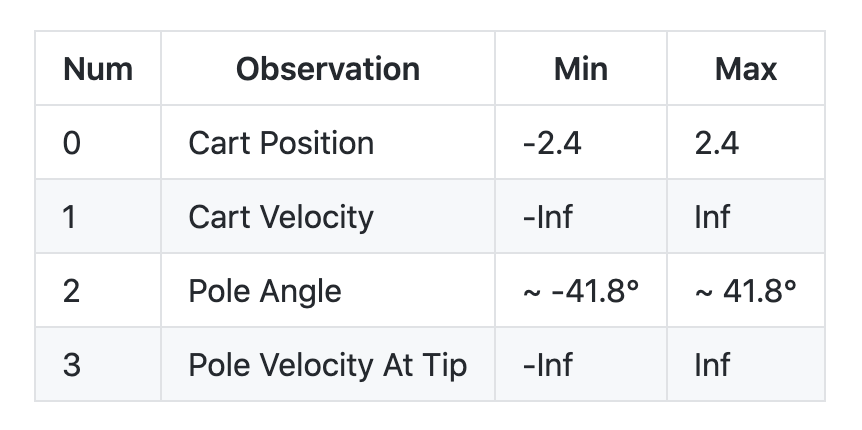

**(2 POE)** How often is the offline network updated to match the online one? Why do we need to do this?

**Your answer:** It is updated frequently to calculate the Q target. (?)

**(4 POE) Optional**

There may be three reasons for the episode to end:

1. The cart slides too far away
1. The pendulum falls too low
1. 200 time steps have passed

As mentioned before, we replace the Q target with the immediate reward only in case 1 and 2. In the third case however, the Q target remains untouched.

Please answer the following questions:

1. How we treat this matter will have an influence on the Q-values being learned, and how they may be interpreted. Assuming we treat it as explained, and that we have managed to converge successfully, describe (in words and/or with mathematical expressions) what the Q-values we have learnt represent.

1. If we would treat case 3 the same as case 1 and 2, we would actually end up with a Partially Observable Markov Decision Process (POMDP). What would we need to add to our observations, in order to obtain an observable MDP again?

**Your answer:** 
1. Explain Q-values! gives us policy values typ...

2. By replacing the Q-target by only the immediate reward, we remove the information about the next state that is input to gamma*Q(s'....). In order to obtain an observable MDP again, we would need to add observations about ??? next/previous ??

Run the cell below to visualize your final policy (the greedy rather than epsilon-greedy one) in an episode from this environment.

**Note:** In order to visualize, the env.render() command needs to work out on your system (see comment a few cells above).

In [42]:
import time
num_episodes = 10
env = gym.make("CartPole-v0")

if enable_visualization:
    for i in range(num_episodes):
            state = env.reset() #reset to initial state
            state = state[None,:]
            terminal = False # reset terminal flag
            while not terminal:
                #env.render()
                time.sleep(.05)
                with torch.no_grad():
                    q_values = ddqn.online_model(torch.tensor(state, dtype=torch.float, device=device)).cpu().numpy()
                policy = eps_greedy_policy(q_values.squeeze(), .1) # greedy policy
                action = np.random.choice(num_actions, p=policy)
                state, reward, terminal, _ = env.step(action) # take one step in the evironment
                state = state[None,:]
    # close window
    env.close();

Plot the episodic rewards obtained throughout the optimization, together with a moving average of it (since the episodic reward is usually very noisy).

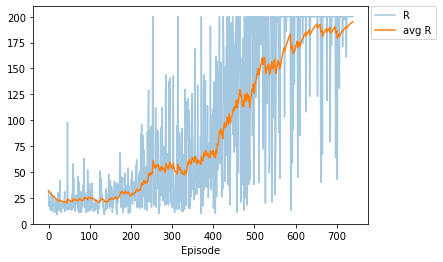

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

rewards = plt.plot(R, alpha=.4, label='R')
avg_rewards = plt.plot(R_avg,label='avg R')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Episode')
plt.ylim(0, 210)
plt.show()

Congratulations, you have now successfully implemented the DDQN algorithm. You are encouraged to explore different problems. There are a lot of different environments ready for you to implement your algorithms in. A few of these resources are:
* [OpenAI gym](https://github.com/openai/gym)
* [OpenAI Universe](https://github.com/openai/universe)
* [DeepMind Lab](https://deepmind.com/blog/open-sourcing-deepmind-lab/)

The model you implemented in this lab can be extended to solve harder problems. A good starting-point is to try to solve the Acrobot-problem, by loading the environment as 

**gym.make("Acrobot-v1")**.

The problem might require some modifications to how you decay $\epsilon$, but otherwise, the code you have written within this lab should be sufficient. 

### Task 3.4 Atari games

**(4 POE Optional)**

A common benchmark for reinforcement learning algorithms is the old Atari games. Each timestep for the Atari games, the agent observes a screenshot as its current state.

There is an issue with this definition of the agent state, what?

Name at least two solutions to the problem, and why it wouldn't work well without these changes. 

Hint:
- Imagine the game of pong. What is important for the algorithm to predict? What is the state of the agent? Is it possible to play the game optimally with this state formulation?

**Your answer:** The first problem is that the screenshot only shows the environment state at current time step and not the direction, i.e. the state at next time step. For example in pac man, you would not know from a screenshot which direction the ghosts are travelling. 

One solution could be to implement the previous state in order to know the direction and velocity of the environment state (eg the ping pong ball), and thus we could predict the next state of the environment. If we also add a second previous state at t-2, we could estimate the acceleration of the environment state, which may be useful for e.g. ping pong or space invaders. This would not be necessary for e.g. pac man where there is no acceleration of the environment (ghosts).

Without these changes, we would not be able to predict upcoming states, and could thus not optimise our own actions. For example, if you in pac man don't know which direction the ghosts are travelling you would have to move about only at a safe distance from the ghosts and only at spaces where there is no chance of getting caught at a dead end. This will most likely mean you cannot achieve the highest score, because of the pattern in which the ghosts move. If you do know their movement pattern however, you can follow behind them, and hide in side ailes/pockets, in order to get to places "behind" them, which is necessary to get all points.

^Implement q-learning since this algorithm will predict the optimal path by exploring the enviroment around. 

(Another solution is to implement a sequence of previous actions and observations in order to learn the game strategy. Hence, with these sequences, s_t, the Markov Decision process is then known and can be used to predict the optimal game strategy with e.g. value iteration, Monte Carlo or TD.)